In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os

In [5]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

print("Type: ", type(data_transforms))

Type:  <class 'dict'>


In [6]:
# Define the data directory
data_dir = 'Car_Bike_Dataset'

# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

In [9]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 699, 'val': 136}


['Bike', 'Car']

In [10]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\bimsa\.conda\envs\YOLO-ObjectDetection\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\bimsa\.conda\envs\YOLO-ObjectDetection\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\bimsa/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.1MB/s]


In [24]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
torch.cuda.is_available()

False

In [32]:
for inputs, labels in dataloaders[phase]:
    inputs = inputs.to(device)
    labels = labels.to(device)
    print(labels)

tensor([1, 0, 1, 1])
tensor([1, 1, 0, 0])
tensor([0, 0, 0, 0])
tensor([1, 0, 1, 0])
tensor([0, 1, 1, 0])
tensor([0, 0, 0, 0])
tensor([0, 0, 1, 1])
tensor([1, 0, 1, 0])
tensor([1, 0, 1, 1])
tensor([1, 1, 0, 0])
tensor([1, 1, 1, 1])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 1])
tensor([0, 1, 0, 0])
tensor([1, 1, 0, 0])
tensor([0, 0, 0, 0])
tensor([0, 1, 0, 1])
tensor([0, 0, 1, 0])
tensor([0, 0, 0, 1])
tensor([0, 1, 1, 1])
tensor([1, 0, 1, 0])
tensor([0, 1, 1, 1])
tensor([1, 1, 0, 1])
tensor([1, 1, 0, 1])
tensor([0, 1, 1, 1])
tensor([0, 1, 1, 0])
tensor([1, 0, 0, 0])
tensor([0, 0, 1, 0])
tensor([0, 1, 1, 1])
tensor([1, 0, 1, 1])
tensor([1, 0, 0, 1])
tensor([0, 0, 1, 0])
tensor([0, 1, 1, 1])
tensor([1, 1, 0, 1])


In [12]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

print("Training complete!")

train Loss: 0.8347 Acc: 0.7468
val Loss: 0.0671 Acc: 0.9779
train Loss: 0.4113 Acc: 0.8526
val Loss: 0.0380 Acc: 0.9926
train Loss: 0.3758 Acc: 0.8612
val Loss: 0.3339 Acc: 0.8676
train Loss: 0.3761 Acc: 0.8627
val Loss: 0.0660 Acc: 0.9632
train Loss: 0.4104 Acc: 0.8469
val Loss: 0.0690 Acc: 0.9706
train Loss: 0.2924 Acc: 0.8941
val Loss: 0.0348 Acc: 0.9779
train Loss: 0.3319 Acc: 0.8698
val Loss: 0.0717 Acc: 0.9559
train Loss: 0.2729 Acc: 0.8956
val Loss: 0.0548 Acc: 0.9706
train Loss: 0.2429 Acc: 0.9113
val Loss: 0.0297 Acc: 0.9779
train Loss: 0.3654 Acc: 0.8627
val Loss: 0.0795 Acc: 0.9706
Training complete!


In [14]:
torch.save(model.state_dict(), 'car-bike_classification_model.pth')

# Do Predictions by the model

In [15]:
import torch
from torchvision import models, transforms
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('car-bike_classification_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]

In [36]:
image_path = 'car.jpg'  # Replace with the path to your image
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

In [37]:
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
class_names = ['Bike', 'Car']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

print(f'The predicted class is: {predicted_class_name}')

The predicted class is: Car


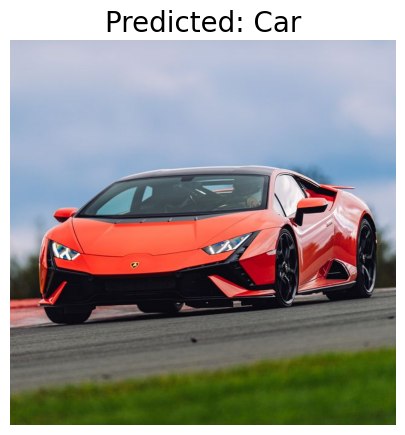

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted: {predicted_class_name}', fontsize=20)
plt.show()
